# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

## Load the Data

In [2]:
df = pd.read_csv('Traffic_Accidents.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [4]:
df.duplicated().sum()

np.int64(43)

In [5]:
# we can see the first 5 rows of the dataset
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [6]:
# firstly we can see that the numerical columns is just 2 columns and we can see the mean & std of each column
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [7]:
# We have 12317 rows and 32 columns
df.shape

(52000, 26)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Implement One-Hot Encoding for nominal categorical variables.
* Reduce dimentions using PCA

In [8]:
# Handling missing values
# First we can see that there is columns with 1000+ missing values and we will drop their columns

# Drop the columns with 1000+ missing values
#drop_missing_values_columns = df.isnull().sum() > 1000
#drop_missing_values_columns = drop_missing_values_columns[drop_missing_values_columns].index
#df = df.drop(columns=drop_missing_values_columns,axis=1)

# Creating a mask for more than 1 missing value in the column and make the index to get the column names
#hadnle_missing_values_columns = df.isnull().sum() > 0
#hadnle_missing_values_columns = hadnle_missing_values_columns[hadnle_missing_values_columns].index

# filling depend on the previous row
#for i in hadnle_missing_values_columns:
#    df[i] = df[i].fillna(method='ffill')
    
# drop any row with missing value due to having the previous row missing value
df = df.dropna()

In [9]:
df = df.drop('Location_Easting_OSGR', axis=1)

null_columns = df.columns[df.isna().any()]
for i in null_columns:
    df[i] = df[i].fillna(df[i].mode()[0], inplace=True)

def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for i in df.select_dtypes(exclude=['object']).columns:
    df = remove_outliers(df, i)

le = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = le.fit_transform(df[[i]])

ss = StandardScaler()
for i in df.select_dtypes(exclude=['object']).columns:
    df[i] = ss.fit_transform(df[[i]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sk

In [10]:
X = pd.DataFrame(df).to_numpy()
Z = (X - X.mean()) / X.std()
pca = PCA(n_components=0.9)
pca_X = pca.fit_transform(Z)
pca_X

array([[-2.10633177, -0.39402502,  0.15393621, ..., -1.40558487,
         0.14942015,  0.20669688],
       [ 0.48564309,  0.39466868,  3.07590566, ...,  1.042443  ,
         0.16648093, -1.74498266],
       [ 0.6494695 ,  0.84478248, -0.52882311, ...,  0.01360886,
        -0.83196719,  1.03176945],
       ...,
       [ 0.99035075, -4.71578379,  1.58031513, ..., -0.76082555,
        -0.60002946,  1.30847939],
       [-1.78463286,  1.28476138,  0.3290023 , ...,  0.40204172,
        -0.70954178,  1.13810109],
       [-0.28327667, -0.97660365,  1.96957253, ...,  0.17590053,
         0.15699523,  0.79630791]])

In [11]:
# Check for any inconsistency in the data

for i in df.columns:
    print(f"This is column name {i}")
    print(f"{df[i].unique()}\n")

# Change the time from category to datetime type
# df['Time'] = pd.to_datetime(df['Time'])
# it's commented due to cannot be used in ML if it's working due to the type of the column, so I will make it to be a category
# but if it's used in visualization it's better to be datetime

# Although it's going to create all the time in one day, but we want to use it for the time itself not the day. we can include column
# *Day_of_week* to include the day of the week in the visualization and analysis



This is column name Location_Northing_OSGR
[-0.66828443  0.90676297  0.87003285 ... -0.6678107   0.91760031
 -0.46574959]

This is column name Longitude
[ 0.63413155  0.68482406 -0.23748804 ... -0.64620464  1.05264977
  0.9519289 ]

This is column name Latitude
[-0.66728125  0.90449565  0.87554116 ... -0.45764528 -0.73544223
 -0.89844375]

This is column name Police_Force
[-0.91439407 -0.35446706 -0.46645246  0.28011689  0.76538697 -0.80240867
  0.35477382 -0.20515319 -0.50378093  0.69073003  0.16813149 -0.31713859
 -0.72775174  0.65340156  0.91470084  0.24278842  0.54141616  0.6160731
 -0.69042327  1.36264245  2.59448188  0.7280585  -0.7650802  -0.16782472
 -0.429124   -0.13049625  0.98935777  2.63181035  2.66913881  1.06401471
  2.51982494 -0.57843787  0.80271543  0.20545995  1.10134318  1.28798551
  0.42943076  0.39210229  1.39997092  0.57874463 -0.5411094  -0.83973714
  0.8400439   1.32531398  2.55715341 -0.09316779  1.02668624  2.70646728
  0.31744536]

This is column name Acciden

In [12]:
# I will use One-Hot Encoding to convert the categorical columns for the ML model but not right now because I want the catagorical columns in Data Visualization and ease to implement the code.

In [13]:
# Use Standard Scaler on the numerical columns to make it around 0 mean and 1 standard deviation to normalize the distribution
ss = StandardScaler()
df[['Police_Force ','Number_of_Vehicles']] = ss.fit_transform(df[['Police_Force','Number_of_Vehicles']])

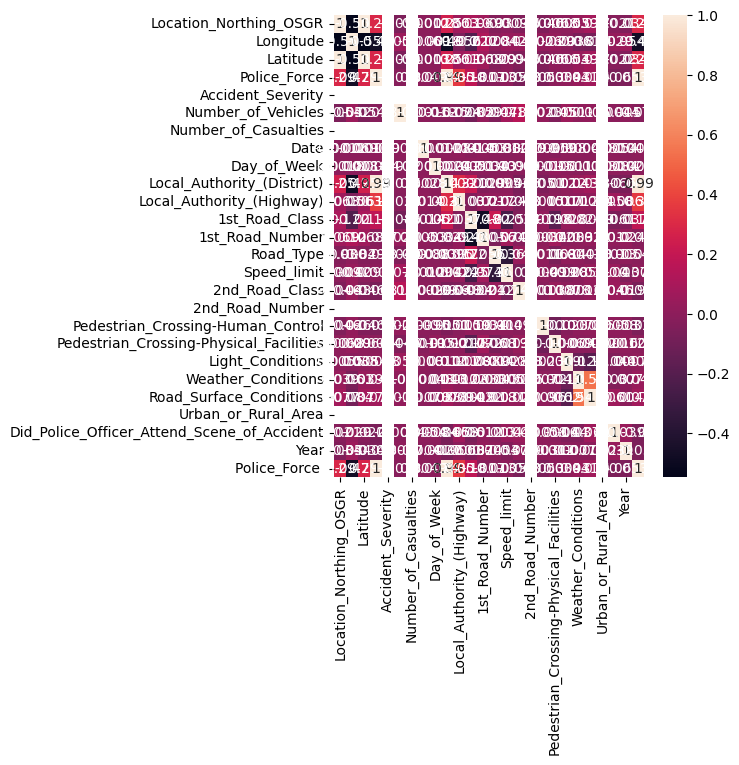

In [14]:
import seaborn as sns
# Heatmap of correlation matrix of numerical data
corr_matrix = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(5,6))
sns.heatmap(corr_matrix,annot=True)
plt.show()
# As we can see from the matrix below that there is no correaltion between all numerical columns


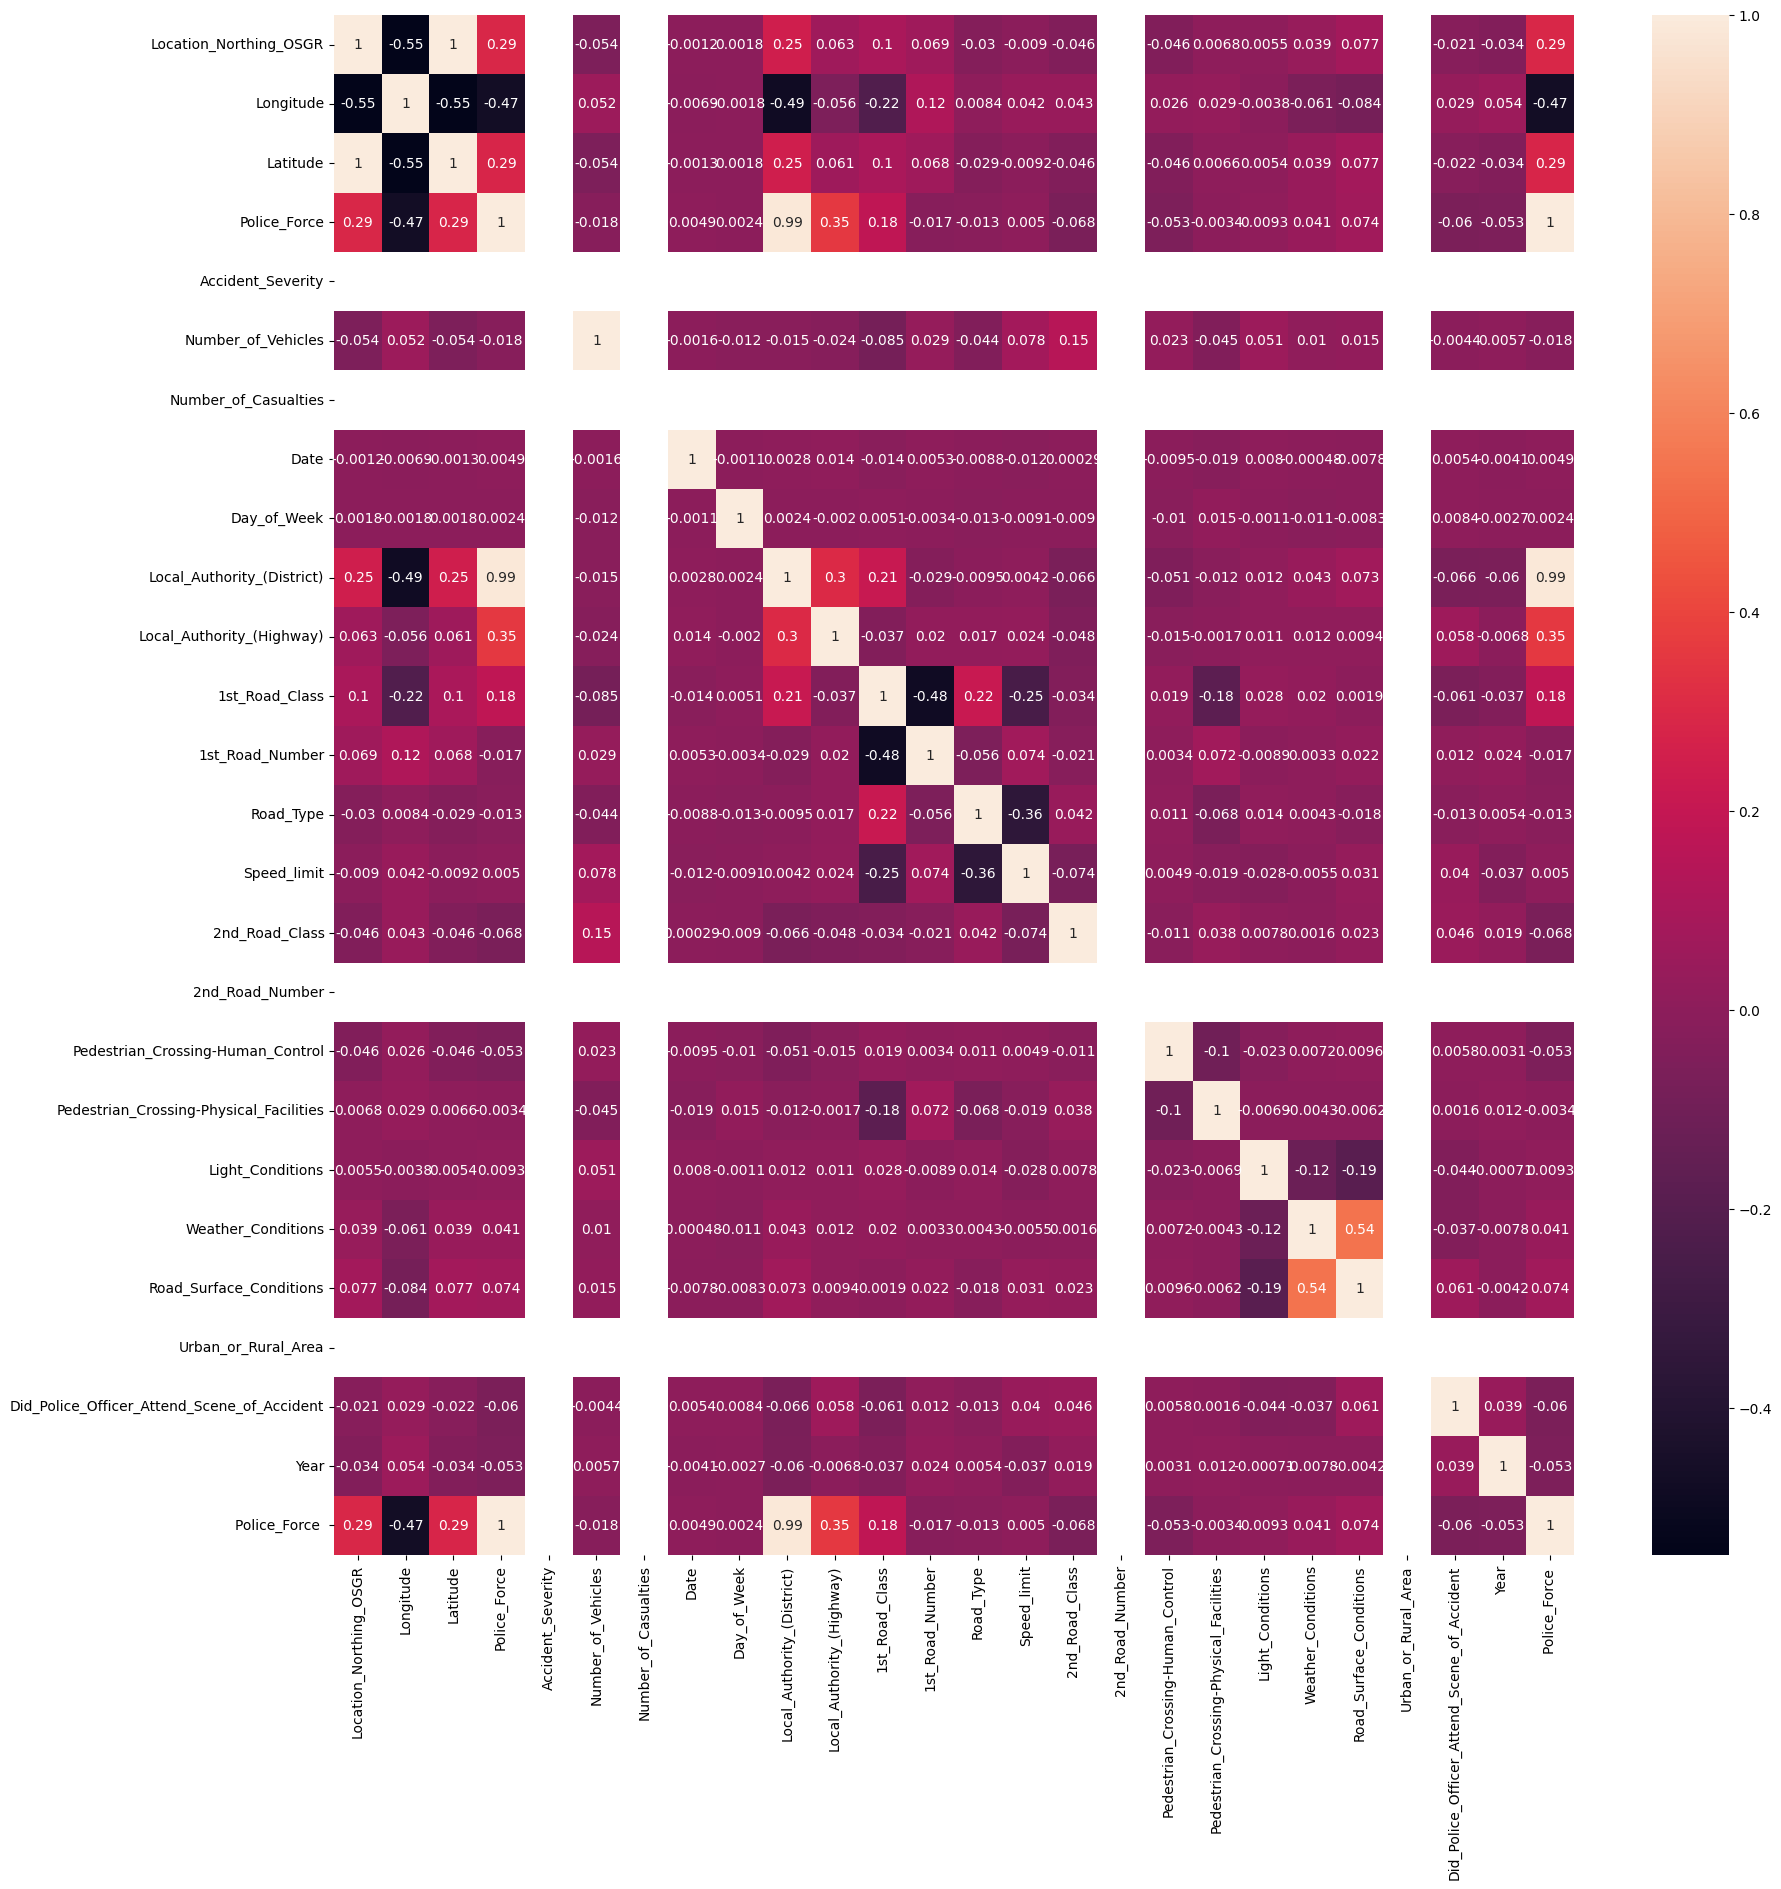

In [15]:


# use Label Encoding to convert the categorical columns temporarily to numerical for correlation matrix
# Heatmap of all the data
le = LabelEncoder()
df_corr = df.copy()
for i in df_corr.select_dtypes(include=['object']).columns:
    df_corr[i] = le.fit_transform(df_corr[i])
    
corr_matrix = df_corr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)
plt.show()
# As we can see from the matrix below that the only correlation that between columns is between *Casualty_Class* & *Sex_of_Casualty* & *Age_band_of_casualty* & *Casualty_severity* and they have a positive correlation between each other

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [16]:

### After using it and see the result I will not use it becuase the data of the two columns is not normally distributed and the IQR will remove a lot of the data

def remove_outliers(df,column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column_name] >= (Q1 - 1.2 * IQR)) & (df[column_name] <= (Q3 + 1.2 * IQR))]

# df = remove_outliers(df,'Police_Force')
# df = remove_outliers(df,'Number_of_casualties')



In [17]:
# Feature Engineering
# we already did the transformation in the Time column and Standard Scaler in the numerical columns
# For the One-Hot Encoding, I will use it later in the ML model


# Feature Creating
# Creating a feature that could result in a better model performance and a better understanding of the data
df['Ratio_vehicles_casualties'] = df['Police_Force'] / df['Number_of_Vehicles']

In [18]:
from sklearn.decomposition import PCA
X = pd.DataFrame(df).to_numpy()
Z = (X - X.mean()) / X.std()
# Let's say, components = 2
pca = PCA(n_components=2)
pca_X = pca.fit_transform(Z)

In [19]:
pca_X

array([[-2.85156851e+00, -6.73998772e-02],
       [ 1.66024892e-03,  1.37616974e+00],
       [-4.94375676e-01,  1.54930698e+00],
       ...,
       [ 1.76812772e+00, -7.08388375e-01],
       [-2.66103084e+00, -5.18787692e-02],
       [ 7.41901937e-01, -1.75164494e+00]])

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

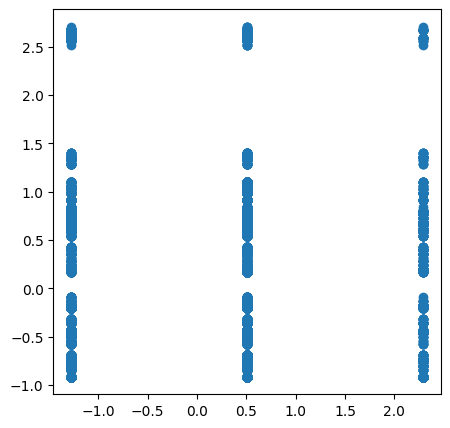

In [20]:
# Scatter plot of Number of casualties with number of vehicle involved

plt.figure(figsize=(5,5))
plt.scatter(df['Number_of_Vehicles'], df['Police_Force'])
plt.show()

# Just want to plot it to see the 0.2 correlation between the two columns, and as we can see that it is small and we can see the linear model to the top between them

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

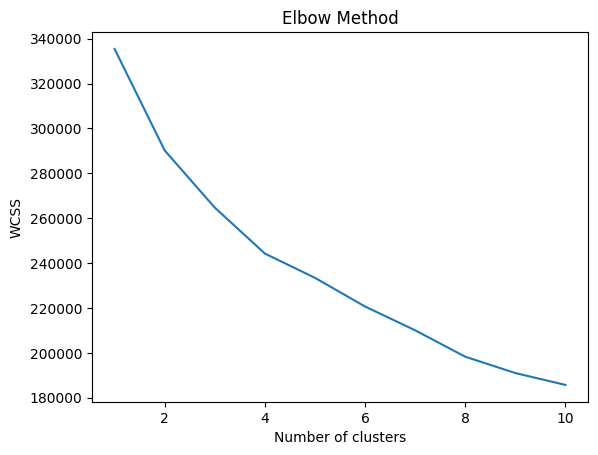

KMeans(n_clusters=3)

In [21]:
X = pd.DataFrame(df).to_numpy()
Z = (X - X.mean()) / X.std()
pca = PCA(n_components=0.9)
pca_X = pca.fit_transform(Z)
pca_X

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(pca_X)


In [22]:
from sklearn.decomposition import PCA
X = pd.DataFrame(df).to_numpy()
Z = (X - X.mean()) / X.std()
# Let's say, components = 2
pca = PCA(n_components=2)
pca_X = pca.fit_transform(Z)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [24]:
y_kmeans = kmeans.predict(X)

ValueError: X has 27 features, but KMeans is expecting 16 features as input.

In [ ]:
y_kmeans = kmeans_model.predict(pca_X)

# Plot the data points with their predicted cluster center
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Mark the centroids
plt.show()

ValueError: X has 2 features, but KMeans is expecting 15 features as input.

In [30]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

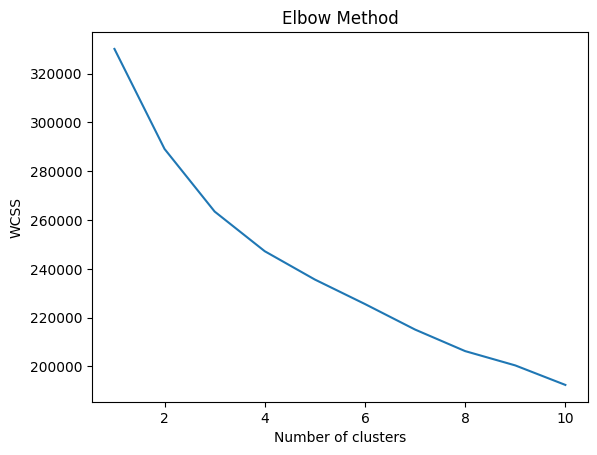

In [31]:
# Plotting the results onto a line graph to observe the elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[ 2.41306580e+00 -1.84716663e+00  2.40443714e+00  2.61312593e+00
   0.00000000e+00 -1.62967341e-01  0.00000000e+00  5.00474351e-02
   1.93897878e-04  2.30494621e+00  1.53885040e+00  1.68421896e-01
   1.01349460e-02 -1.15175936e-01 -1.87928871e-02 -1.36148865e-01
   0.00000000e+00 -2.18169045e-01  9.94881166e-02  7.42464389e-03
   1.16315021e-01  2.57337319e-01  0.00000000e+00 -4.52660522e-02
  -1.12837613e-01  2.61312593e+00  1.84060420e+00]
 [ 1.27462426e-01  1.25447227e-01  1.29019217e-01 -5.82964347e-01
   0.00000000e+00 -1.25902141e+00  0.00000000e+00 -8.07138677e-03
   5.55463827e-03 -5.87817499e-01 -2.10524881e-01  2.53538886e-02
  -6.91216100e-03  8.99269249e-02 -1.13654282e-01 -2.37372089e-01
   0.00000000e+00  3.83589493e-03  8.73535297e-02 -6.14571564e-02
  -1.22154411e-02 -4.76128226e-02  0.00000000e+00  1.08671897e-01
   3.17728727e-02 -5.82964347e-01  4.61256959e-01]
 [ 4.72116563e-02  1.44006036e-01  4.87662099e-02 -6.77015744e-01
   0.00000000e+00  6.53382191e-01  0.000

## Plot the data points with their predicted cluster center

In [25]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Mark the centroids
plt.show()

NameError: name 'y_kmeans' is not defined

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
#

* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?